In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 18 17:20:28 2022

@author: WANG Haokun
@author: CHATROUX Marc
@author: LI Yuansheng
"""

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import optimize
import tsp_gradient_outils as tsp

# Essayons de résoudre le problème test suivant:
min :
$$
x_1 + x_2
$$
s.t.
$$
x_1^2 + x_2^2 = 32
$$

In [2]:
def function_f(x_value):
    """
    Fonction de cout classique
    """
    result = np.sum(x_value)
    return result

def function_h(x_value):
    """
    Fonction de cout des contraintes d'égalités
    """
    result = 32 - np.sum(x_value**2)
    return np.array([[result]])

def function_global_cost(x_value, gamma_value, rho_value):
    """
    Fonction de cout global
    """
    result = 0
    result += function_f(x_value)
    result += rho_value / 2 * np.sum(np.square(function_h(x_value) + gamma_value / rho_value))
    return result

def function_eval(x_value):
    """
    Evalue le respect des contraintes
    """
    result = 0
    result += sum(sum(function_h(x_value)))
    return result

def function_distance(x1, x2):
    """
    Return the distance between x1 and x2
    """
    return np.sqrt(np.sum(np.square(x1 - x2)))

In [3]:
X_var = np.array([2, -3])
Gamma_var = np.ones((1, 1))
Epsilon_var = 1e-2
Rho_var = 1e-1

Gamma_min = np.ones((1, 1)) * -10
Gamma_max = np.ones((1, 1)) * 10
Epsilon_min = 1e-5

Theta_epsilon = 0.95 
Theta_rho = 0.95
Theta_sigma = 0.95
D_min= 1e-5

In [4]:
# STOCKAGE DE VALEURS
X_list, Gamma_list, Epsilon_list, Rho_list = [], [], [], []
Cost_list, Global_cost_list, Eval_list = [], [], []
X_list += [X_var]
Gamma_list += [Gamma_var]
Epsilon_list += [np.array([[Epsilon_var]])]
Rho_list += [Rho_var]
Cost_list += [function_f(X_var)]
Global_cost_list += [function_global_cost(X_var, Gamma_var, Rho_var)]
Eval_list += [function_eval(X_var)]


for k in tqdm(range(2000)):

    # SAUVEGARDE TEMPORAIRE POUR CALCULS
    X_var = X_var.copy()
    Gamma_var = Gamma_var.copy()

    X_var_old = X_var.copy()

    # CALCUL DU NOUVEAU X
    function_to_solve = lambda X :  function_global_cost(X, Gamma_var, Rho_var)
    X_var = optimize.minimize(function_to_solve, X_var, tol=Epsilon_var).x
    distance = function_distance(X_var, X_var_old)

    # MODIF DES PARAMETRES DU RALM
    Gamma_var = np.clip(Gamma_var + Rho_var * function_h(X_var), Gamma_min, Gamma_max)
    Epsilon_var = max(Epsilon_min, Theta_epsilon * Epsilon_var)

    max_1 = function_h(X_var).max()
    max_2 = function_h(X_var_old).max()
    if k == 0 or max_1 <= Theta_sigma * max_2:
        Rho_var = Rho_var
    else:
        Rho_var = Theta_rho * Rho_var


    # STOCKAGE DE VALEURS
    X_list += [X_var]
    Gamma_list += [Gamma_var]
    Epsilon_list += [np.array([[Epsilon_var]])]
    Rho_list += [Rho_var]
    Cost_list += [function_f(X_var)]
    Global_cost_list += [function_global_cost(X_var, Gamma_var, Rho_var)]
    Eval_list += [function_eval(X_var)]

    #ARRET DE BOUCLE
    if distance <= D_min and Epsilon_var <= Epsilon_min:
        break

  7%|▋         | 134/2000 [00:00<00:07, 266.26it/s]


##### FIN !!! / DISTANCE = 0.0 / EPSILON = 1e-05 ###


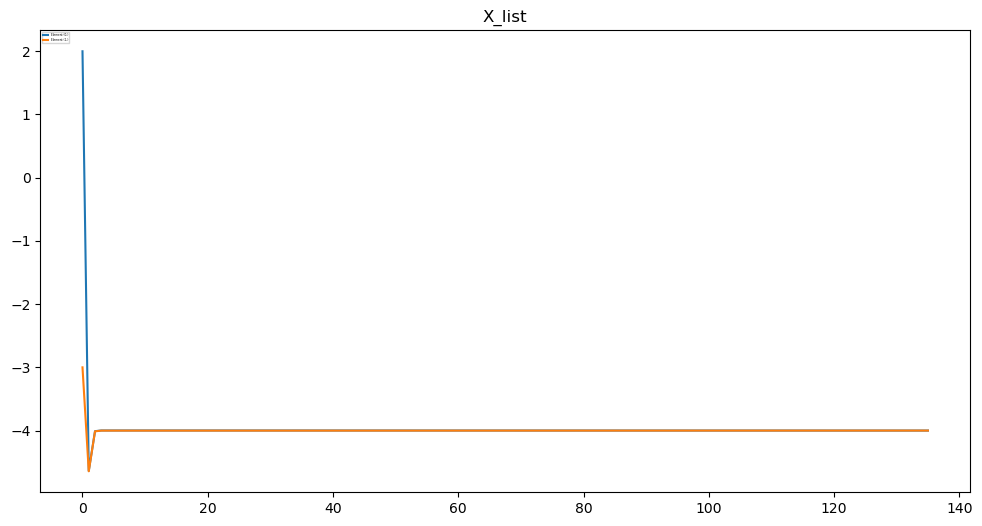

In [5]:
# AFFICHAGE DU BILAN
print(f"##### FIN !!! / DISTANCE = {distance} / EPSILON = {Epsilon_var} ###")
# tsp.plot_array([X_list, Gamma_list, Epsilon_list, Rho_list, Cost_list, Global_cost_list, Eval_list], ["X_list", "Gamma_list", "Epsilon_list", "Rho_list", "Cost", "Global cost", "Eval"], ungroup=True)
tsp.plot_array([X_list], ["X_list"], ungroup=True)

In [6]:
print("X :", X_var)
print("Fonction f :", function_f(X_var))
print("Fonction h :", function_h(X_var))
print("Gamma :", Gamma_var)
print("Rho :", Rho_var)
print("Fonction L :", function_global_cost(X_var, Gamma_var, Rho_var))

X : [-3.99999603 -3.99999663]
Fonction f : -7.999992655993294
Fonction h : [[5.87520265e-05]]
Gamma : [[-0.12500003]]
Rho : 0.0013451875657683454
Fonction L : -2.1922566301268196


In [7]:
X_var = np.array([-4, -4])

print("X :", X_var)
print("Fonction f :", function_f(X_var))
print("Fonction h :", function_h(X_var))
print("Fonction L :", function_global_cost(X_var, Gamma_var, Rho_var))

X : [-4 -4]
Fonction f : -8
Fonction h : [[0]]
Fonction L : -2.1922566301305757
